X_b [[1.  6.7]
 [1.  4.6]
 [1.  3.5]
 [1.  5.5]]
y [[9.1]
 [5.9]
 [4.6]
 [6.7]]


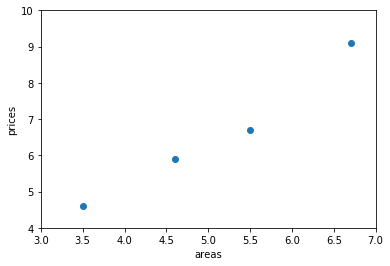

In [6]:
# b=0.2 
# a=1.2
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1]


# X_b chứa thêm bias (=1)
m=4
X = data[:,0]
y = data[:,1:]
X_b = np.c_[np.ones((m, 1)), X]

print('X_b', X_b)
print('y', y)

plt.scatter(areas, prices)
plt.xlabel('areas')
plt.ylabel('prices')
plt.xlim(3,7)
plt.ylim(4,10)
plt.show()

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


[[-14.28]
 [-67.04]]
[[ -9.4]
 [-51.7]]
[[-2.7146]
 [-9.5011]]
[[ -3.4795158 ]
 [-20.12038626]]
[[-0.1427542 ]
 [-0.78514807]]
[[-0.28985253]
 [-1.35741142]]
[[-0.39549334]
 [-1.81926936]]
[[ -1.65063146]
 [-11.05923076]]
[[0.70704316]
 [2.93128921]]
[[-0.54261552]
 [-3.63552401]]
[[0.29262002]
 [0.95280528]]
[[1.52265329]
 [8.37459307]]
[[0.25580734]
 [1.46632066]]
[[0.11872233]
 [0.82011172]]
[[0.04574028]
 [0.35080385]]
[[-0.25304864]
 [-1.025208  ]]
[[0.10738037]
 [0.76615874]]
[[0.30390238]
 [1.6714631 ]]
[[-0.12023125]
 [-0.30684599]]
[[-1.08601155]
 [-6.74741009]]
[[-0.31465162]
 [-2.40878569]]
[[0.29938916]
 [1.29471788]]
[[-0.1884567 ]
 [-1.67121924]]
[[0.34310368]
 [1.56408724]]
[[0.24619318]
 [0.86167614]]
[[-0.34709563]
 [-2.61506389]]
[[-0.51778277]
 [-3.46914456]]
[[0.75642907]
 [3.13629445]]
[[0.48726064]
 [2.02718772]]
[[-0.26075777]
 [-2.12759965]]
[[0.93430071]
 [4.87326452]]
[[0.72410214]
 [3.98256176]]
[[0.00521807]
 [0.28980154]]


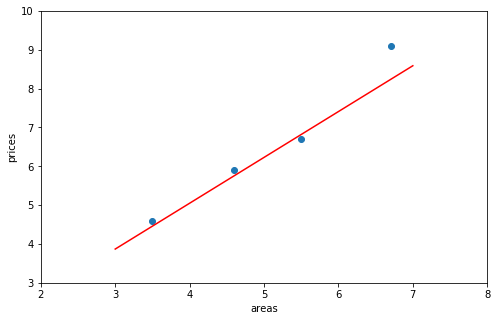

In [13]:
# random space
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib.colors import LogNorm
from itertools import cycle
from numpy import genfromtxt


data = genfromtxt('data.csv', delimiter=',')
m = 4
X = data[:,0]
y = data[:,1]
X_b = np.c_[np.ones((m, 1)), X]

eta = 0.01
index = 0
thetas = np.array([[0.04],[-0.34]])

losses = []

def compute_gradient():
    global thetas
    global losses
    
    sum_of_losses = 0
    gradients = np.zeros((2,1))
    
    for _ in range(2):
        index = random.randint(0, 3)
        xi = X_b[index:index+1]
        yi = y[index:index+1]

        oi = xi.dot(thetas)
        li = (oi - yi)*(oi - yi)
        
        g_li = 2*(oi - yi)
        
        gradients = gradients + xi.T.dot(g_li)
        sum_of_losses = sum_of_losses + li
    
    sum_of_losses = sum_of_losses/2
    gradients     = gradients/2
    losses.append(sum_of_losses[0][0]) 
    
    thetas = thetas - eta*gradients
    
    a = thetas[1][0]
    b = thetas[0][0]
    
    return a,b

def update_plot(i): 
    plt.cla()
    
    global thetas    
    a,b = compute_gradient()
    
    plt.scatter(areas, prices)
    x_value = np.arange(3,8)

    y_value = a*x_value + b 
    plt.plot(x_value, y_value,c='red')

    plt.xlabel('areas')
    plt.ylabel('prices')
    
    plt.xlim(2,8)
    plt.ylim(3,10)

fig, ax = plt.subplots(figsize=(8, 5))
a,b = compute_gradient()

plt.scatter(areas, prices)
x_value = np.arange(3,8)

y_value = a*x_value + b 
plt.plot(x_value, y_value,c='red')

plt.xlabel('areas')
plt.ylabel('prices')

plt.xlim(2,8)
plt.ylim(3,10)

#plt.show()
ani = animation.FuncAnimation(fig, update_plot, interval=2000, frames=range(30), fargs=())    
#HTML(ani.to_html5_video())
ani.save('chap6_data_gif_4.gif', writer='imagemagick', fps=1)

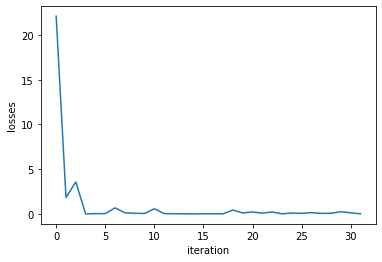

In [14]:
import matplotlib.pyplot as plt

plt.plot(losses[1:])
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

In [3]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('data.csv', delimiter=',')

# X_b chứa thêm bias (=1)
m=4
X = data[:,0]
y = data[:,1:]
X_b = np.c_[np.ones((m, 1)), X]

n_epochs = 1
eta = 0.01
thetas = np.array([[0.04],[-0.34]])
#thetas = np.array([[0.26676], [1.179292]])
#thetas = np.array([[0.28539967], [1.3041778]])
print('thetas', thetas)

thetas_path = [thetas]
losses = []

for epoch in range(n_epochs):
    sum_of_losses = 0
    gradients = np.zeros((2,1))
    
    for index in range(2):
        xi = X_b[index:index+1]
        yi = y[index:index+1]
        
        print('\ndata: ', xi, yi)

        oi = xi.dot(thetas)
        li = (oi - yi)*(oi - yi)        
        g_li = 2*(oi - yi)
        
        print('\n\n z: ', oi)
        print('loss: ', index, li)
        print('gradient_loss: ', index, g_li)
        
        cg = xi.T.dot(g_li)
        print('variable gradient: ', index, cg)
        
        gradients = gradients + cg
        sum_of_losses = sum_of_losses + li
    
    sum_of_losses = sum_of_losses/2
    gradients     = gradients/2
    print('\ngradients: ', gradients)
    losses.append(sum_of_losses[0][0]) 
        
    thetas = thetas - eta*gradients
    print('new params: ', thetas)

thetas [[ 0.04]
 [-0.34]]

data:  [[1.  6.7]] [[9.1]]


 z:  [[-2.238]]
loss:  0 [[128.550244]]
gradient_loss:  0 [[-22.676]]
variable gradient:  0 [[ -22.676 ]
 [-151.9292]]

data:  [[1.  4.6]] [[5.9]]


 z:  [[-1.524]]
loss:  1 [[55.115776]]
gradient_loss:  1 [[-14.848]]
variable gradient:  1 [[-14.848 ]
 [-68.3008]]

gradients:  [[ -18.762]
 [-110.115]]
new params:  [[0.22762]
 [0.76115]]
